In [1]:
%cd '/home/threadripper/PycharmProjects/coh_analysis'

/home/threadripper/PycharmProjects/coh_analysis


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from services.playlist_service import PlaylistService
from services.num_edits_service import NumEditsService
from services.popularity_service import PopularityService

In [3]:
mpl.rcParams['figure.dpi'] = 200
sns.set_style("whitegrid")
alpha=0.9

In [4]:
playlist_service = PlaylistService(filtered=False)
playlist_service.load_from_cache()
len(playlist_service.playlists)

1000000

In [5]:
length_data = [pl.nb_tracks for pl in playlist_service.playlists.values()]

In [6]:
len(np.unique(length_data))

247

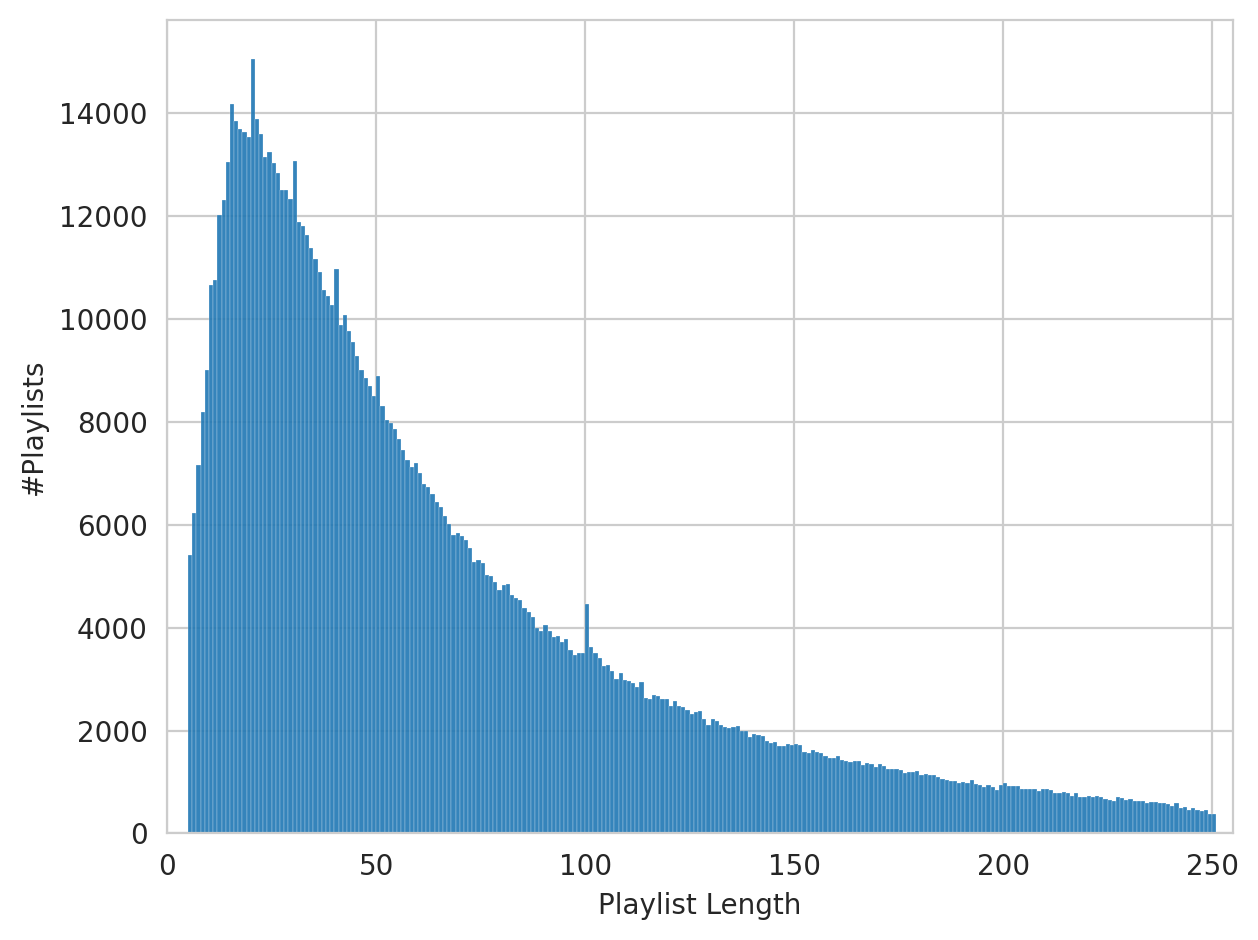

In [7]:
ax = sns.histplot(length_data, bins=max(length_data)-min(length_data), alpha=alpha)
ax.set_xlabel('Playlist Length')
ax.set_ylabel('#Playlists')
ax.set_xlim((0, 255))
plt.tight_layout()
plt.savefig('plots/fig_length_dist.png')
plt.show()

In [8]:
num_edits_service = NumEditsService()
num_edits_service.load_from_cache()

In [9]:
num_edits_data = [num_edits for pid, num_edits in num_edits_service.num_edits.items() if pid in playlist_service.playlists]
len(num_edits_data), min(num_edits_data), max(num_edits_data), len(np.unique(num_edits_data))

(1000000, 1, 201, 197)

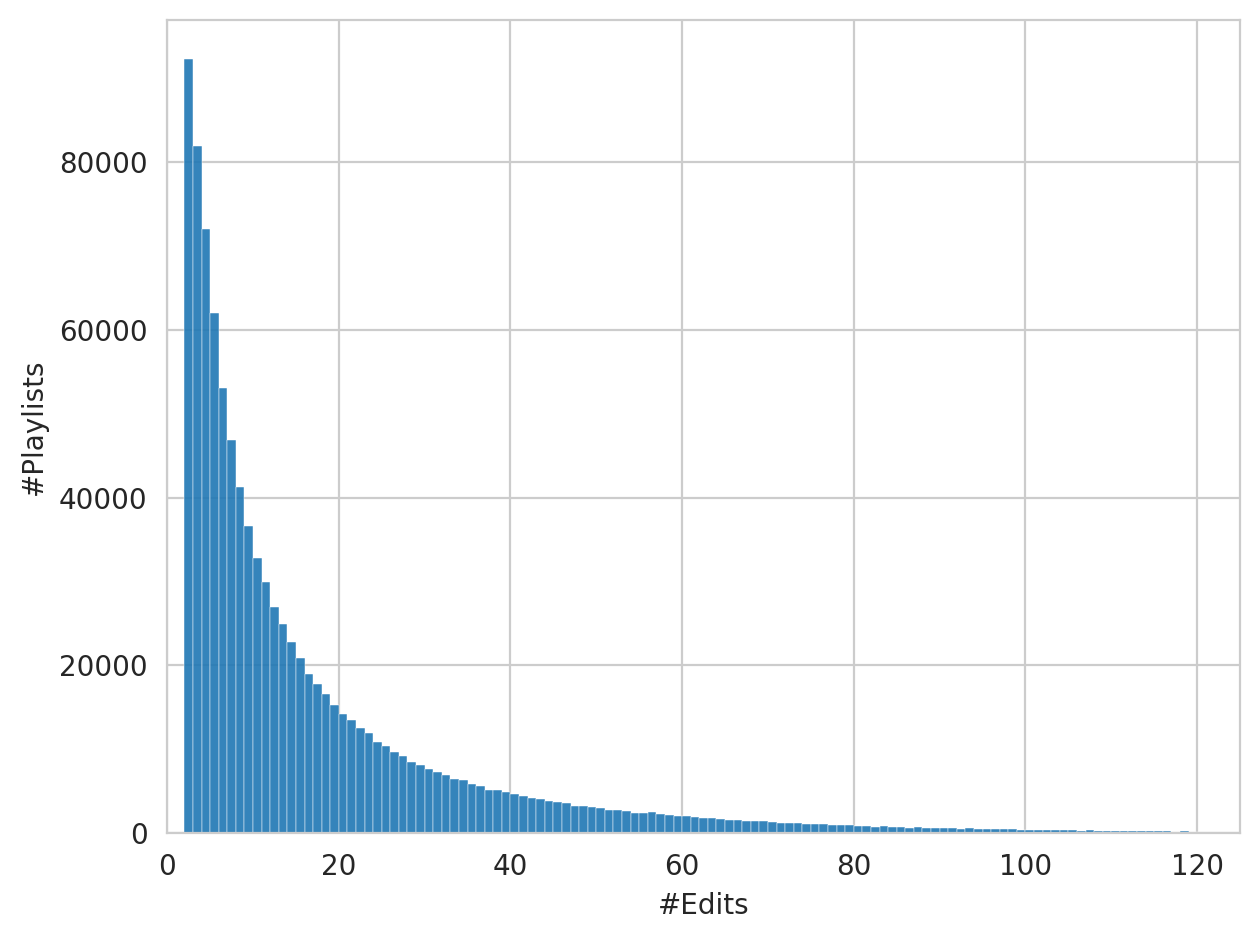

In [10]:
ax = sns.histplot(num_edits_data, bins=200, alpha=alpha)
ax.set_xlabel('#Edits')
ax.set_ylabel('#Playlists')
ax.set_xlim([0, 125])
plt.tight_layout()
plt.savefig('plots/fig_num_edits_dist.png')
plt.show()

In [11]:
track_popularity = [x for x in playlist_service.track_service.count.values() if x < 10000]

In [12]:
values, counts = np.unique(track_popularity, return_counts=True)

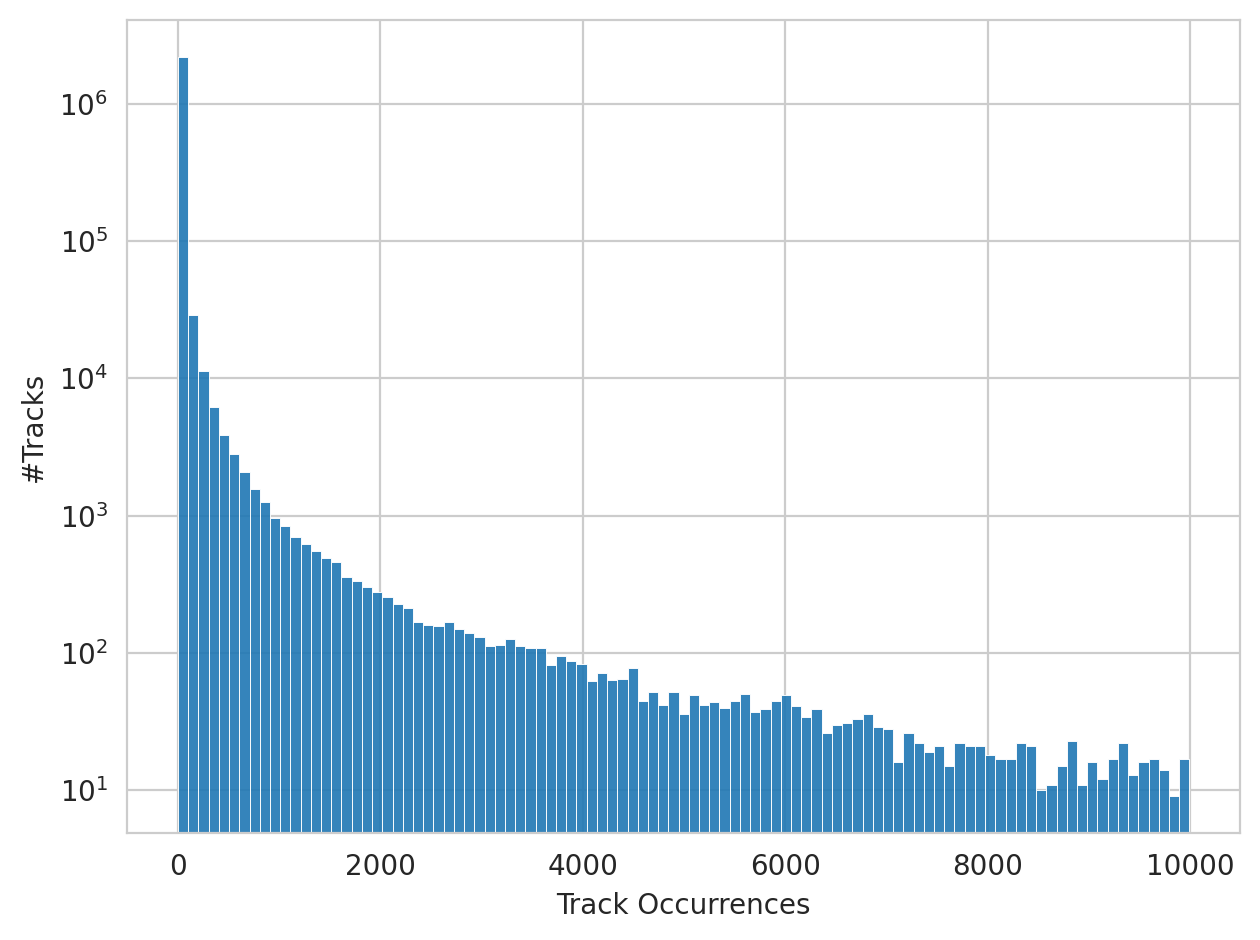

In [13]:
ax = sns.histplot(track_popularity, bins=99, alpha=alpha)
ax.set_xlabel('Track Occurrences')
ax.set_ylabel('#Tracks')
ax.set_yscale("log")
plt.tight_layout()
plt.savefig('plots/fig_track_occurance_dist.png')
plt.show()

In [14]:
popularity_service = PopularityService()
popularity_service.load_from_cache()
len(popularity_service.popularity)

707149

In [15]:
popularity_data = [popularity for popularity in popularity_service.popularity.values()]
min(popularity_data), max(popularity_data), len(np.unique(popularity_data))

(0.0, 10.387322448873086, 704755)

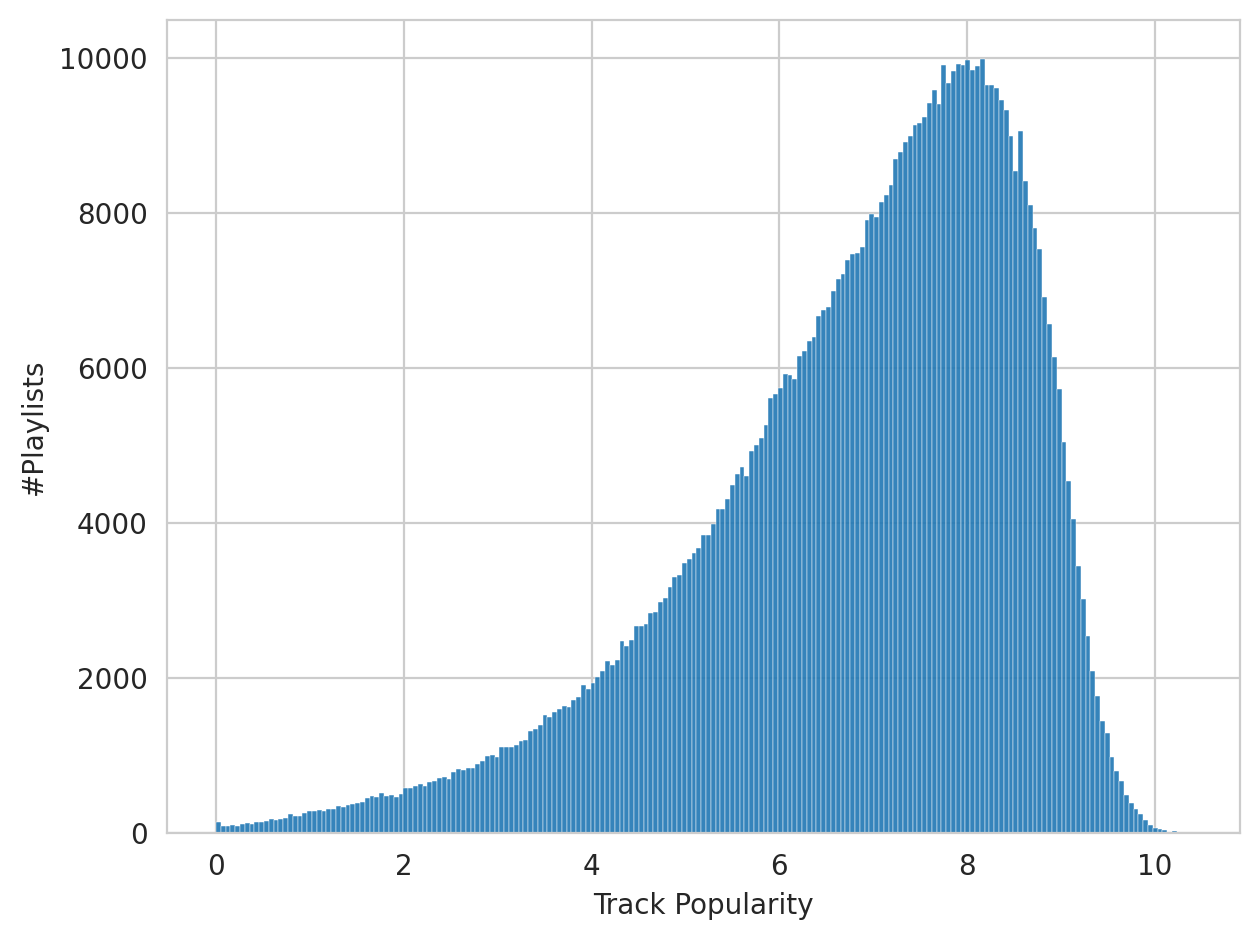

In [16]:
ax = sns.histplot(popularity_data, alpha=alpha)
ax.set_xlabel('Track Popularity')
ax.set_ylabel('#Playlists')
plt.tight_layout()
plt.savefig('plots/fig_track_popularity_dist.png')
plt.show()